In [2]:
import yfinance as yf
import pandas as pd

In [2]:
lulu = yf.Ticker("LULU")
wmt = yf.Ticker("WMT")
wba = yf.Ticker("WBA")
ulta = yf.Ticker("ULTA")
dltr = yf.Ticker("DLTR")

In [3]:
hist_lulu = lulu.history(period="10y")
hist_wmt = wmt.history(period='10y')
hist_wba = wba.history(period="10y")
hist_ulta = ulta.history(period="10y")
hist_dltr = dltr.history(period='10y')

In [4]:
hist_lulu = hist_lulu.reset_index() if hist_lulu.index.name == 'Date' else hist_lulu
hist_wmt = hist_wmt.reset_index() if hist_wmt.index.name == 'Date' else hist_wmt
hist_wba = hist_wba.reset_index() if hist_wba.index.name == 'Date' else hist_wba
hist_ulta = hist_ulta.reset_index() if hist_ulta.index.name == 'Date' else hist_ulta
hist_dltr = hist_dltr.reset_index() if hist_dltr.index.name == 'Date' else hist_dltr

In [5]:
hist_lulu = hist_lulu[(hist_lulu['Date'] >= '2019-01-01') & (hist_lulu['Date'] <= '2024-10-16')]
hist_wmt = hist_wmt[(hist_wmt['Date'] >= '2019-01-01') & (hist_wmt['Date'] <= '2024-10-16')]
hist_wba = hist_wba[(hist_wba['Date'] >= '2019-01-01') & (hist_wba['Date'] <= '2024-10-16')]
hist_ulta = hist_ulta[(hist_ulta['Date'] >= '2019-01-01') & (hist_ulta['Date'] <= '2024-10-16')]
hist_dltr = hist_dltr[(hist_dltr['Date'] >= '2019-01-01') & (hist_dltr['Date'] <= '2024-10-16')]

In [6]:
hist_lulu.to_csv("historical_data_lululemon.csv", index=False)
hist_wmt.to_csv("historical_data_walmart.csv", index=False)
hist_wba.to_csv("historical_data_walgreens.csv", index=False)
hist_ulta.to_csv("historical_data_ulta.csv", index=False)
hist_dltr.to_csv("historical_data_dollartree.csv", index=False)

In [3]:
lulu = pd.read_csv("C:/Users/meuni/Documents/aml_project/data/historical_data_lululemon.csv")
wmt = pd.read_csv("C:/Users/meuni/Documents/aml_project/data/historical_data_walmart.csv")
wba = pd.read_csv("C:/Users/meuni/Documents/aml_project/data/historical_data_walgreens.csv")
ulta = pd.read_csv("C:/Users/meuni/Documents/aml_project/data/historical_data_ulta.csv")
dltr = pd.read_csv("C:/Users/meuni/Documents/aml_project/data/historical_data_dollartree.csv")

In [4]:
companies = [lulu, wmt, wba, ulta, dltr]
names = ['Lululemon', 'Walmart', 'Walgreens', 'Ulta', 'Dollartree']

columns = wba.drop(columns=['Date']).columns
for company in companies:
    company['Date'] = pd.to_datetime(company['Date'])
    for column in columns:
        company[column] = company[column].astype('float32')

C:\Users\meuni\AppData\Local\Temp\ipykernel_69188\3859355911.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  company['Date'] = pd.to_datetime(company['Date'])
C:\Users\meuni\AppData\Local\Temp\ipykernel_69188\3859355911.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  company['Date'] = pd.to_datetime(company['Date'])
C:\Users\meuni\AppData\Local\Temp\ipykernel_69188\3859355911.py:6: FutureWarning: In a future version of pandas, parsing d

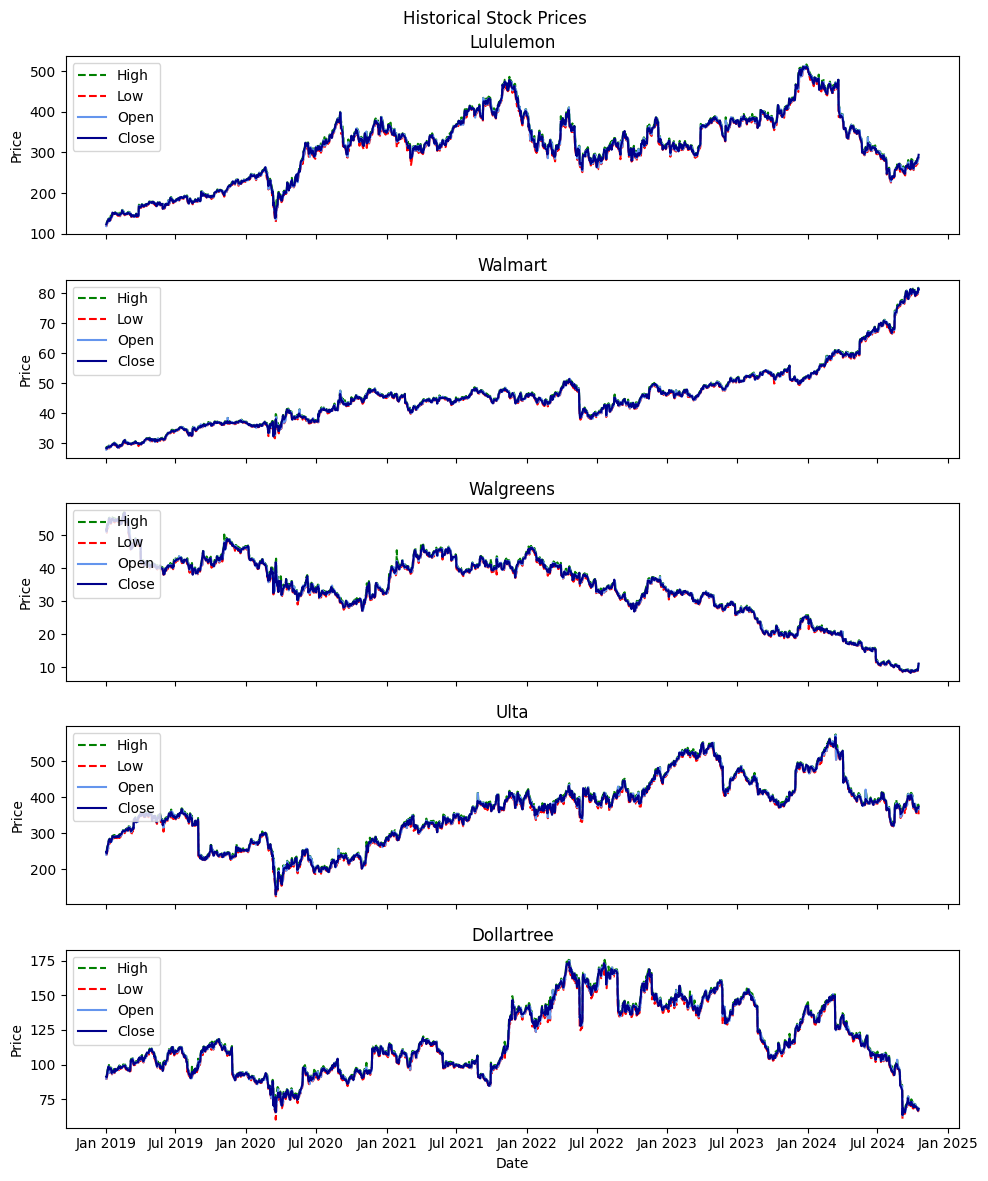

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(len(companies), 1, figsize=(10, 12), sharex=True)

# Plot each company on its own row
for i, company in enumerate(companies):
    
    axes[i].plot(company['Date'], company['High'], label='High', color='Green', linestyle='--')
    axes[i].plot(company['Date'], company['Low'], label='Low', color='red', linestyle='--')
    axes[i].plot(company['Date'], company['Open'], label='Open', color='cornflowerblue', linewidth=1.5)
    axes[i].plot(company['Date'], company['Close'], label='Close', color='darkblue', linewidth=1.5)
    axes[i].set_title(names[i])
    axes[i].set_ylabel('Price')
    axes[i].legend(loc='upper left')

    axes[i].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))  # Major ticks at January and July
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


axes[-1].set_xlabel('Date')
plt.suptitle('Historical Stock Prices')
plt.tight_layout()
plt.show()